**Quantum Fourier Transform**
---

### 📌 **Problem Statement**
The Quantum Fourier Transform (QFT) is a quantum analogue of the classical discrete Fourier transform. It transforms a quantum state into its frequency domain representation.

The QFT is a crucial component in many quantum algorithms, including Shor's algorithm for factoring large numbers.

DFT (Discrete Fourier Transform) is used to transfer singals from the time domain to the frequencey domain or in more generalized description mapping one domain x to another domain $F(\omega)$.

$$
F(\omega) = \sum_{n=0}^{N-1} x_n e^{2\pi i \frac{nk}{N}}
$$

Where $f(n)$ is the input signal, $F(\omega)$ is the output signal, and $N$ is the number of samples.

### 🧠 **Classical vs Quantum**
* **Classical Fourier Transform** requires $\mathcal{O}(N^2)$ time for $N$ data points.
* **Quantum Fourier Transform** can be computed in $\mathcal{O}(N \log N)$ time using quantum parallelism.
* The QFT is exponentially faster than the classical Fourier transform for large $N$.

### 🧪 **High-Level Steps of QFT**
1. **Prepare** a quantum state $|x\rangle$.
2. **Apply Hadamard gates** to the qubits to create superpositions.
3. **Apply controlled phase gates** to introduce phase shifts based on the qubit positions.
4. **Swap the qubits** to reverse their order.
5. **Measure** the qubits to obtain the frequency domain representation.
6. **Interpret** the measurement results to extract the frequency information.
7. **Use** the QFT in quantum algorithms, such as Shor's algorithm for factoring.
8. **Optimize** the QFT circuit for specific applications, such as error correction or quantum simulation.

### 🧠 Intuition

* **Amplitude encoding**: Like in the classical Fourier transform, the QFT maps time-domain data into frequency-domain data, but using **amplitudes and phases of qubits**.
* **Quantum superposition**: The QFT exploits superposition to encode all frequency components in parallel.
* **Interference**: The controlled phase gates adjust phases so that when measured, the output gives useful interference patterns for solving problems like periodicity detection.

---

### 🧪 Applications

* **Shor’s Algorithm**: Finds the period of a modular exponential function using QFT.
* **Quantum Phase Estimation**: Estimates the eigenvalues of a unitary operator.
* **Hidden Subgroup Problem**: General problem class for which QFT can extract hidden structure.

---

Would you like to see a diagram of the QFT circuit for 2 or 3 qubits, or an implementation in code (e.g., Qiskit)?



$$
|Z - basis\rangle -[QFT]-> |X - basis\rangle
$$
Z basis states are |0> and |1> states, while X basis states |+> and |- >.


In [14]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

In [15]:
s = '110'
num_qubits = len(s)

In [16]:
s = s[::-1]

In [17]:
qc = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    if s[i] == '1':
        qc.x(i)
qc.barrier()
qc.draw()

░ 
q_0: ──────░─
     ┌───┐ ░ 
q_1: ┤ X ├─░─
     ├───┤ ░ 
q_2: ┤ X ├─░─
     └───┘ ░

CROT
$$
CROT(\theta)_k =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\theta} \\
\end{bmatrix}
$$

$CU_1$ gate
$$
\theta = \frac{\pi}{2^{k-1}}
$$

In [18]:
from numpy import pi

In [19]:
# always start from the most significant qubut here it is q_2
qc.h(2)

we will need to include rotations while traversing from the qubit down to the least significant qubit hence j_n, ... , j_0 as we traverse down the qubit states decrease by each degree each of the controlled phase rotations

In [20]:
# here CU1 k = 2 which is indx of q_2 and our parameter \theta and if you put the k = 2 then \theta becomes \pi/2
qc.cp(pi/2, 1, 2)
qc.draw()

░               
q_0: ──────░───────────────
     ┌───┐ ░               
q_1: ┤ X ├─░───────■───────
     ├───┤ ░ ┌───┐ │P(π/2) 
q_2: ┤ X ├─░─┤ H ├─■───────
     └───┘ ░ └───┘

In [21]:
# now CROT from 2 to the next qubit down while doubling the phase denominator k = 1 then it becomes pi/4
qc.cp(pi/4, 0, 2)
qc.draw()

░                        
q_0: ──────░────────────────■───────
     ┌───┐ ░                │       
q_1: ┤ X ├─░───────■────────┼───────
     ├───┤ ░ ┌───┐ │P(π/2)  │P(π/4) 
q_2: ┤ X ├─░─┤ H ├─■────────■───────
     └───┘ ░ └───┘

In [22]:
# as we are in k = 0
# we will dtop the least significant qubit and start again
qc.h(1)
qc.cp(pi/2, 0, 1)
qc.draw()

░                                      
q_0: ──────░────────────────■─────────────■───────
     ┌───┐ ░                │       ┌───┐ │P(π/2) 
q_1: ┤ X ├─░───────■────────┼───────┤ H ├─■───────
     ├───┤ ░ ┌───┐ │P(π/2)  │P(π/4) └───┘         
q_2: ┤ X ├─░─┤ H ├─■────────■─────────────────────
     └───┘ ░ └───┘

In [23]:
# we reached to the least significant qubit
qc.h(0)
qc.draw()

░                                      ┌───┐
q_0: ──────░────────────────■─────────────■───────┤ H ├
     ┌───┐ ░                │       ┌───┐ │P(π/2) └───┘
q_1: ┤ X ├─░───────■────────┼───────┤ H ├─■────────────
     ├───┤ ░ ┌───┐ │P(π/2)  │P(π/4) └───┘              
q_2: ┤ X ├─░─┤ H ├─■────────■──────────────────────────
     └───┘ ░ └───┘

In [24]:
for qubit in range(num_qubits//2):
    print(f"swapping qubit {qubit} with {num_qubits - qubit - 1}")
    qc.swap(qubit, num_qubits - qubit - 1)
qc.draw()

swapping qubit 0 with 2


░                                      ┌───┐   
q_0: ──────░────────────────■─────────────■───────┤ H ├─X─
     ┌───┐ ░                │       ┌───┐ │P(π/2) └───┘ │ 
q_1: ┤ X ├─░───────■────────┼───────┤ H ├─■─────────────┼─
     ├───┤ ░ ┌───┐ │P(π/2)  │P(π/4) └───┘               │ 
q_2: ┤ X ├─░─┤ H ├─■────────■───────────────────────────X─
     └───┘ ░ └───┘

In [25]:
from qiskit_aer import StatevectorSimulator

statevector = StatevectorSimulator().run(qc).result().get_statevector()

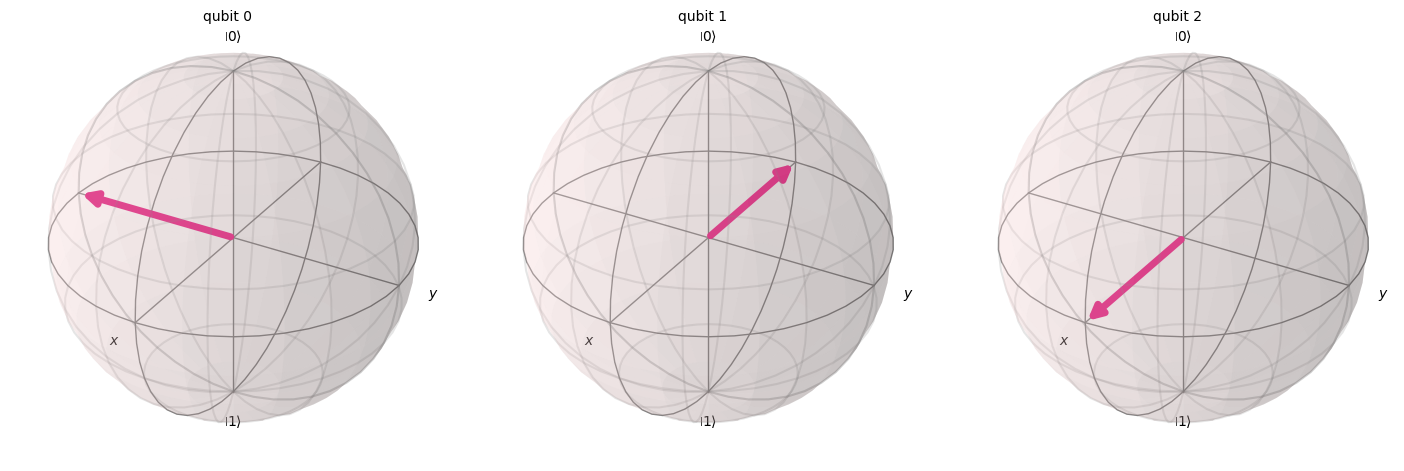

In [26]:
plot_bloch_multivector(statevector)

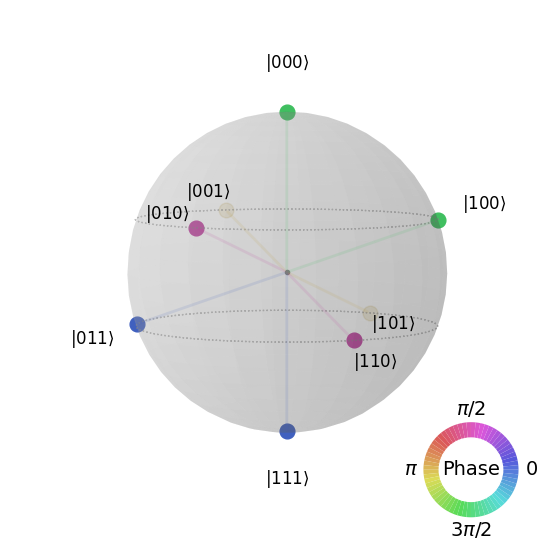

In [27]:
plot_state_qsphere(statevector)